In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading Dataset
df=pd.read_csv("DS - Assignment Part 1 data set.csv")
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [3]:
df.shape

(414, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [5]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [6]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [7]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

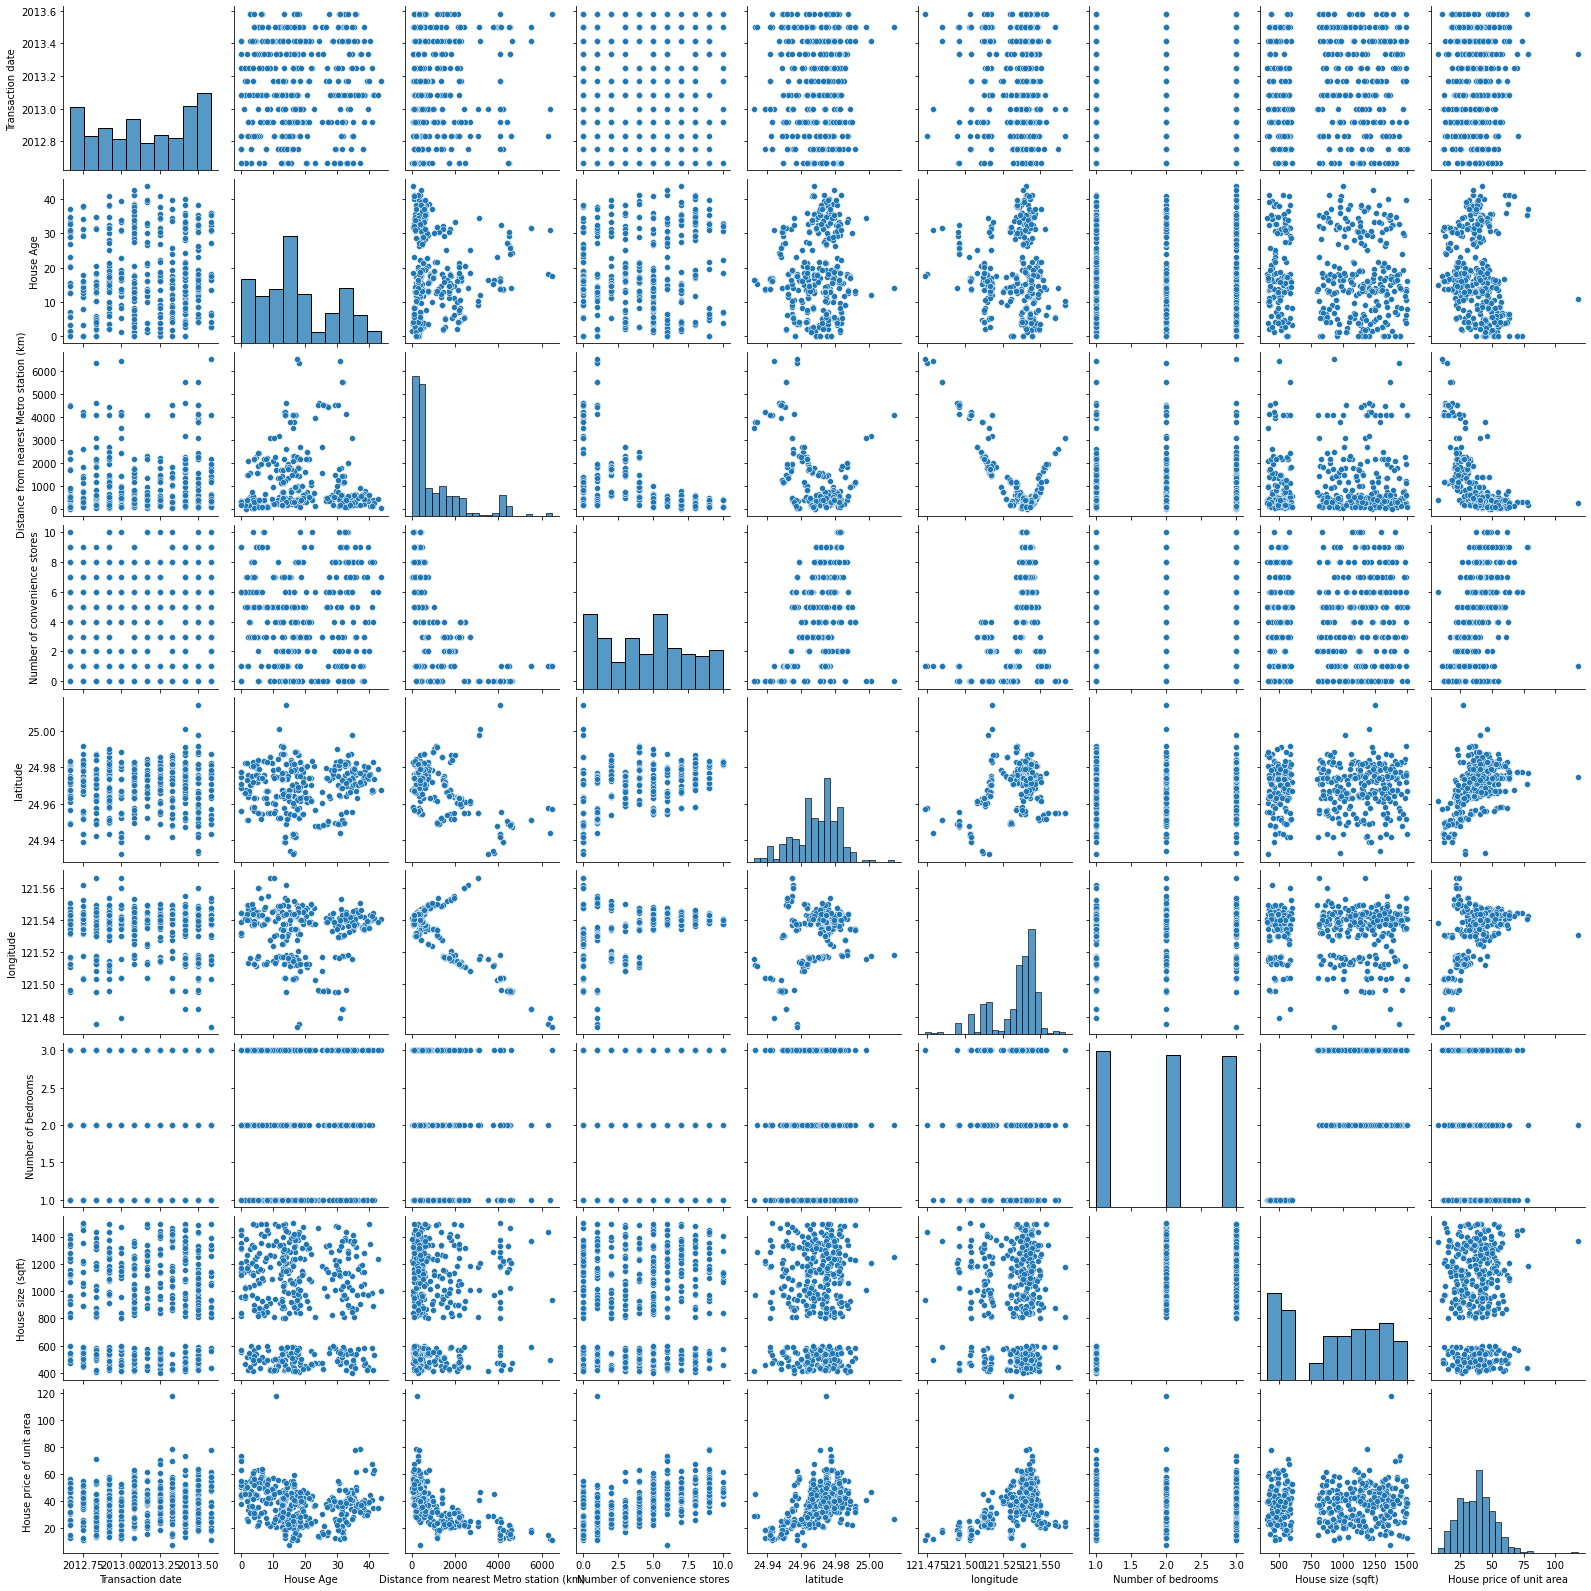

In [8]:
sns.pairplot(df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='House price of unit area', ylabel='Density'>

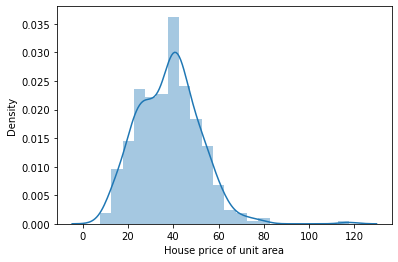

In [12]:
sns.distplot(df['House price of unit area'])

<AxesSubplot:>

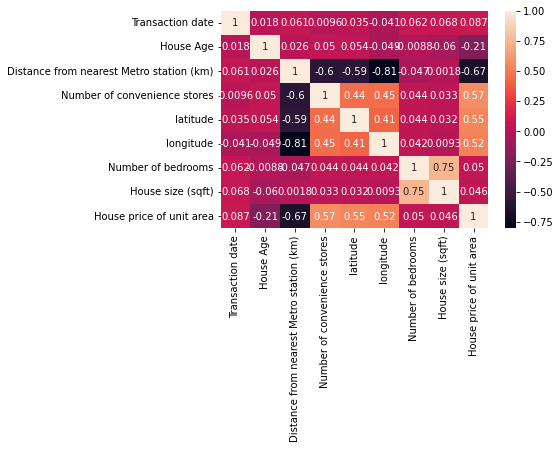

In [13]:
sns.heatmap(df.corr(), annot=True)

We can infer from above plot that the how the data is correlated. The 100% correlation is shown with the pastel yellow color.

# Model Building


Train and test the data

Since y is our target variable, so it will have only one feature i.r 'House price of unit area' and X will contain all the features that will be required to predict the price.

In [14]:
X = df[['Transaction date','House Age','Distance from nearest Metro station (km)','Number of convenience stores','latitude','longitude','Number of bedrooms','House size (sqft)']]
y = df['House price of unit area']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Linear Regression :

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
linreg = LinearRegression()

In [19]:
linreg.fit(X_train,y_train)


LinearRegression()

LinearRegression model evaluation

In [21]:
print(linreg.intercept_)

-12762.867437599281


In [22]:
coeff_df = pd.DataFrame(linreg.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Transaction date,5.121644
House Age,-0.278265
Distance from nearest Metro station (km),-0.004871
Number of convenience stores,0.977849
latitude,227.415183
longitude,-26.187975
Number of bedrooms,-0.602915
House size (sqft),0.002724


Predictions from our Linear Regression Model

In [23]:
predictions = linreg.predict(X_test)

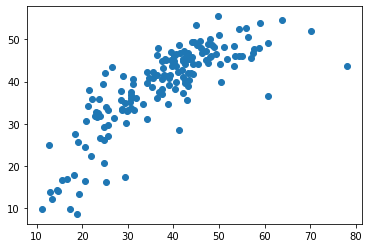

In [24]:
plt.scatter(y_test,predictions)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


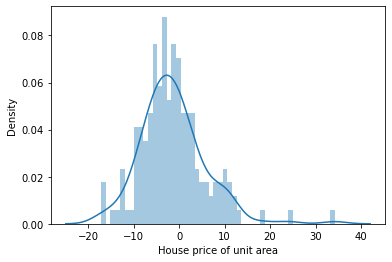

In [25]:
sns.distplot((y_test-predictions),bins=50);

In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.

Regression Evaluation Metrics
There are 3 common evaluation metrics for regression problems:

(i) Mean Absolute Error (MAE) (ii) Mean Squared Error (MSE) (iii) Root Mean Sqaured Error (RMSE)

All of these are loss functions because we want to minimize them

In [27]:
from sklearn import metrics

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.529405238710387
MSE: 53.32362332296355
RMSE: 7.302302604176544


Conclusion :
We have created a Linear Regression Model which we help the real state agent for estimating the house price.